In [2]:
#  Load a sample of images
import pandas as pd
import numpy as np
from torch.nn import CosineSimilarity
import torch
from tqdm import tqdm
import os
import json
from collections import defaultdict
from PIL import Image
import plotly.express as px
import plotly.io as pio
from transformers import pipeline

/home/kebl7383/anaconda3/envs/culture-bias/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the descriptors
with open(os.path.join('../../clip_probing/experiments/region_experiments/descriptors.json'), "r") as f:
        descriptors_json = json.load(f)

In [5]:
# Load the image embeddings
image_embeddings_df = pd.read_csv('../../clip_probing/experiments/dalle3_specified_prompts/image_embeddings.csv', index_col=0)
print(image_embeddings_df.shape)

(3863, 512)


In [6]:
# Load the descriptor embeddings
descriptor_embeddings = pd.read_csv('../../clip_probing/experiments/region_experiments/descriptors_embeddings.csv', index_col=0)
print(descriptor_embeddings.shape)

(95, 512)


In [6]:
# Calculate the cosine similarities between all descriptors and all images
def cosine_similarity(text_vector, image_array):
    # Normalize the text vector
    text_vector /= np.linalg.norm(text_vector)
    # Normalize each image vector in the array
    image_array /= np.linalg.norm(image_array, axis=1, keepdims=True)
    # Compute the dot product between the text vector and each image vector
    dot_products = np.dot(image_array, text_vector)
    return dot_products

In [70]:
comparison_results_dict = defaultdict(dict)
for descriptor in descriptor_embeddings.index.tolist():
    # Get the descriptor text feature embeddings
    descriptor_emb = descriptor_embeddings.loc[descriptor].values
    # Calculate the cosine similarity between the descriptor and all images
    image_embeddings = image_embeddings_df.values
    cosin_sims = cosine_similarity(descriptor_emb, image_embeddings)
    comparison_results_dict[descriptor] = cosin_sims

# Save the comparison results
comparison_results_df = pd.DataFrame(
    comparison_results_dict, index= image_embeddings_df.index
)

In [71]:
comparison_results_df.head()

,A photo of clean food.,A photo of elevated food.,A photo of refined food.,A photo of visually appealing food.,A photo of artfully presented food.,A photo of inviting food.,A photo of exquisite food.,A photo of elegant food.,A photo of polished food.,A photo of aesthetic food.,...,A photo of greasy food.,A photo of low-quality food.,A photo of run-down food.,A photo of dated food.,A photo of plain food.,A photo of mediocre food.,A photo of uninspired food.,A photo of clunky food.,A photo of budget food.,A photo of pedestrian food.
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_01.png",0.257753,0.257294,0.258378,0.267608,0.264085,0.275055,0.262646,0.254994,0.270464,0.240138,...,0.226508,0.239244,0.254557,0.258030,0.260975,0.234911,0.241445,0.247985,0.239769,0.245737
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_04.png",0.278437,0.259589,0.252480,0.264849,0.257005,0.272746,0.254747,0.253896,0.273731,0.240739,...,0.221929,0.254599,0.265187,0.256454,0.268256,0.237490,0.248249,0.252180,0.244121,0.241493
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_02.png",0.288876,0.281876,0.275155,0.282812,0.276433,0.282258,0.275395,0.272685,0.294426,0.262071,...,0.236676,0.265726,0.283353,0.275854,0.284440,0.255347,0.263907,0.270628,0.257515,0.262256
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_03.png",0.298504,0.281403,0.264422,0.278413,0.267690,0.287724,0.269150,0.253883,0.284956,0.256326,...,0.233970,0.262358,0.280167,0.270799,0.282712,0.244460,0.261134,0.266775,0.251056,0.259186
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_00.png",0.235127,0.264020,0.252615,0.270447,0.266604,0.284138,0.268271,0.254695,0.271526,0.239823,...,0.212272,0.229130,0.254907,0.255323,0.249515,0.232126,0.238639,0.238159,0.243246,0.234996


In [72]:
comparison_results_df.shape

(3863, 95)

In [73]:
# Extract  the dish name, model name and continent
def extract_dish_name(file_path):
    # Split the file path into its components
    path_components = file_path.split(os.sep)
    indices_to_check = ["all_submitted_dishes", "countries_all", "all_submitted_dishes_dalle3"]
    # Find the index of 'all_submitted_dishes' in the path components
    for index_name in indices_to_check:
        try:
            index = path_components.index(index_name)
            # The model name is the next component after 'all_submitted_dishes'
            if index_name == "all_submitted_dishes":
                dish_name = path_components[index + 3]
            elif index_name == "countries_all":
                dish_name = path_components[index + 3]
            else:
                dish_name = path_components[index + 2]
            return dish_name
        except ValueError:
            continue
    return None

def extract_model_name(file_path):
    # Split the file path into its components
    path_components = file_path.split(os.sep)
    indices_to_check = ["all_submitted_dishes", "countries_all", "all_submitted_dishes_dalle3"]
    # Find the index of 'all_submitted_dishes' in the path components
    for index_name in indices_to_check:
        try:
            index = path_components.index(index_name)
            # The model name is the next component after 'all_submitted_dishes'
            if index_name == "all_submitted_dishes":
                model_name = path_components[index + 1]
            elif index_name == "countries_all":
                model_name = path_components[index + 2]
            else:
                model_name = path_components[index + 3]
            return model_name
        except ValueError:
            continue
    return None

def extract_country_name(file_path):
    # Split the file path into its components
    path_components = file_path.split(os.sep)
    indices_to_check = ["all_submitted_dishes", "countries_all", "all_submitted_dishes_dalle3"]
    # Find the index of 'all_submitted_dishes' in the path components
    for index_name in indices_to_check:
        try:
            index = path_components.index(index_name)
            # The model name is the next component after 'all_submitted_dishes'
            if index_name == "all_submitted_dishes":
                countries = path_components[index + 2]
                countries = countries.split(", ")
            elif index_name == "countries_all":
                country_string = path_components[index + 1]
                        # Split the string at the underscore
                country = country_string.split("_")
                countries = [country[1]]
            else:
                countries = path_components[index + 1]
                countries = countries.split(", ")
            return countries
        except ValueError:
            continue
    return None

In [74]:
comparison_results_df['dish_name'] = comparison_results_df.index.map(extract_dish_name)
comparison_results_df['model_name'] = comparison_results_df.index.map(extract_model_name)
comparison_results_df['country_name'] = comparison_results_df.index.map(extract_country_name)

In [75]:
comparison_results_df.head()

,A photo of clean food.,A photo of elevated food.,A photo of refined food.,A photo of visually appealing food.,A photo of artfully presented food.,A photo of inviting food.,A photo of exquisite food.,A photo of elegant food.,A photo of polished food.,A photo of aesthetic food.,...,A photo of dated food.,A photo of plain food.,A photo of mediocre food.,A photo of uninspired food.,A photo of clunky food.,A photo of budget food.,A photo of pedestrian food.,dish_name,model_name,country_name
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_01.png",0.257753,0.257294,0.258378,0.267608,0.264085,0.275055,0.262646,0.254994,0.270464,0.240138,...,0.258030,0.260975,0.234911,0.241445,0.247985,0.239769,0.245737,Iyán or Ruam-Yo,dalle3,"[Nigeria, Togo, Benin, Côte d'Ivoire]"
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_04.png",0.278437,0.259589,0.252480,0.264849,0.257005,0.272746,0.254747,0.253896,0.273731,0.240739,...,0.256454,0.268256,0.237490,0.248249,0.252180,0.244121,0.241493,Iyán or Ruam-Yo,dalle3,"[Nigeria, Togo, Benin, Côte d'Ivoire]"
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_02.png",0.288876,0.281876,0.275155,0.282812,0.276433,0.282258,0.275395,0.272685,0.294426,0.262071,...,0.275854,0.284440,0.255347,0.263907,0.270628,0.257515,0.262256,Iyán or Ruam-Yo,dalle3,"[Nigeria, Togo, Benin, Côte d'Ivoire]"
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_03.png",0.298504,0.281403,0.264422,0.278413,0.267690,0.287724,0.269150,0.253883,0.284956,0.256326,...,0.270799,0.282712,0.244460,0.261134,0.266775,0.251056,0.259186,Iyán or Ruam-Yo,dalle3,"[Nigeria, Togo, Benin, Côte d'Ivoire]"
"all_submitted_dishes_dalle3/Nigeria, Togo, Benin, Côte d'Ivoire/Iyán or Ruam-Yo/dalle3/Nigeria, Togo, Benin, Côte d'Ivoire_069_Iyán or Ruam-Yo_00.png",0.235127,0.264020,0.252615,0.270447,0.266604,0.284138,0.268271,0.254695,0.271526,0.239823,...,0.255323,0.249515,0.232126,0.238639,0.238159,0.243246,0.234996,Iyán or Ruam-Yo,dalle3,"[Nigeria, Togo, Benin, Côte d'Ivoire]"


In [76]:
# Get the current directory
current_directory = os.getcwd()
# Get the parent directory
parent_directory = os.path.dirname(os.path.dirname(current_directory))
countries_df = pd.read_csv(os.path.join(parent_directory, 'data/countries_with_continent.csv'))

In [77]:
countries_df.head()

,Name,Official Name,Association,Country Code,Continent Code,Continent Name
0,Afghanistan,The Islamic Republic of Afghanistan,NaN,AF,AS,Asia
1,Akrotiri and Dhekelia,Akrotiri and Dhekelia,The United Kingdom of Great Britain and Northe...,GB,EU,Europe
2,Åland Islands,Åland,The Republic of Finland,AX,EU,Europe
3,Albania,The Republic of Albania,NaN,AL,EU,Europe
4,Algeria,The People's Democratic Republic of Algeria,NaN,DZ,AF,Africa


In [78]:
country_to_continent = dict(zip(countries_df['Name'], countries_df['Continent Name']))

In [79]:
# Rest of the code remains the same
def map_country_to_continent(country_list):
    continents = []
    for country in country_list:
        if country == 'Russia':
            continents.extend(['Europe', 'Asia'])
        else:
            continent = country_to_continent.get(country)
            if continent:
                continents.append(continent)
    return list(set(continents))

comparison_results_df['continent_list'] = comparison_results_df['country_name'].apply(map_country_to_continent)

In [80]:
# from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

In [81]:
all_descriptors = []
# Access the descriptors
descriptors = descriptors_json["descriptors"]
for descriptor in descriptors:
    for group, sentiments in descriptor.items():
        all_descriptors.extend(sentiments["positive"])
        all_descriptors.extend(sentiments["negative"])

In [82]:
image_prompt = 'A photo of {descriptor} food.'

In [83]:
image_prompts = [image_prompt.format(descriptor=descriptor) for descriptor in all_descriptors]

In [84]:
descriptor_weights_dict = {}
for idx, descriptor in enumerate(all_descriptors):
    descriptor_weights_dict[descriptor] = sentiment_analysis(image_prompts[idx])[0]

In [85]:
descriptor_weights_dict['clean']['score']

0.9978747367858887

In [86]:
def get_descriptor_weight(descriptor, descriptor_weights_dict):
    label = descriptor_weights_dict[descriptor]['label']
    score = descriptor_weights_dict[descriptor]['score']
    if label == 'NEGATIVE':
        score = -score
    return score

def calculate_weighted_cosine_sim(row, descriptors, image_prompt, descriptor_type, weight):
    total_weighted_score = 0
    for desc in descriptors[descriptor_type]:
        cosine_similarity = row[image_prompt.format(descriptor=desc)]
        weighted_score = weight * cosine_similarity
        total_weighted_score += weighted_score
    # Normalize by the number of descriptors
    normalized_score = total_weighted_score / len(descriptors[descriptor_type])
    return normalized_score

def get_compound_value(sample_row, descriptors, image_prompt):
    pos = calculate_weighted_cosine_sim(sample_row, descriptors, image_prompt, "positive", 1)
    neg = calculate_weighted_cosine_sim(sample_row, descriptors, image_prompt, "negative", -1)
    compound_value = pos + neg  # Neg is negative, so adding it effectively subtracts it
    return compound_value

def normalize_scores(scores):
    max_score = max(scores)
    min_score = min(scores)
    normalized_scores = [(score - min_score) / (max_score - min_score) * 2 - 1 for score in scores]
    return normalized_scores

In [87]:
for descriptor_group in descriptors_json['descriptors']:
    descriptor_group_name = list(descriptor_group.keys())[0]
    print(f"Processing Descriptor Group: {descriptor_group_name}")

    results_df = []
    # Group by model type
    group_by_model = comparison_results_df.groupby("model_name")
    for model, df in group_by_model:
        print(f"Processing Model: {model}")
        expanded_rows = []
        for idx, row in df.iterrows():
            continents = row["continent_list"]
            if isinstance(continents, list):
                for continent in continents:
                    expanded_row = row.copy()
                    expanded_row["continent_name"] = continent
                    expanded_rows.append(expanded_row)
            else:
                expanded_rows.append(row)
        expanded_df = pd.DataFrame(expanded_rows)
        expanded_df['compound_value'] = expanded_df.apply(lambda row: get_compound_value(row,descriptor_group[descriptor_group_name], image_prompt), axis=1)
        expanded_df['normalized_compound_value'] = normalize_scores(expanded_df['compound_value'])
        continents_mean = expanded_df.groupby("continent_name")['normalized_compound_value'].mean().reset_index()
        continents_mean['model_name'] = model
        results_df.append(continents_mean)
    
    results_df = pd.concat(results_df)
    results_df.to_csv(f"./results/specific_prompts/dalle3/{descriptor_group_name}_results.csv")

Processing Descriptor Group: presentation
Processing Model: dalle3
Processing Descriptor Group: taste
Processing Model: dalle3
Processing Descriptor Group: style
Processing Model: dalle3


In [180]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def plot_descriptor(df, title, output_file):
    # Split the data by model
    df_dalle2 = df[df['model_name'] == 'dalle2']
    df_dalle3 = df[df['model_name'] == 'dalle3']
    df_sd21 = df[df['model_name'] == 'sd21']

    # Define the color sequence for the continents
    color_sequence = {
        'Africa': '#F2545B',
        'Antarctica': '#74c2e1',
        'Asia': '#785EF0',
        'Europe': '#648FFF',
        'North America': '#078BA0',
        'Oceania': '#3DD24E',
        'South America': '#FFB000'
    }

    # Create the subplots
    fig = make_subplots(rows=1, cols=3, subplot_titles=("Stable Diffusion v2.1", "DALL-E 2","DALL-E 3"), shared_yaxes=True, shared_xaxes=True)

    # Create the traces for each model
    trace_sd21 = go.Bar(
        y=df_sd21['continent_name'],
        x=df_sd21['normalized_compound_value'],
         width=0.5,
        name='Stable Diffusion 2.1',
        orientation='h',
        marker=dict(color=[color_sequence[c] for c in df_sd21['continent_name']]),
        hovertemplate='Continent: %{y}<br>Normalized Presentation Score: %{x:.2f}<extra></extra>',
        showlegend=False  # Hide from legend to avoid duplicate entries
    )

    trace_dalle2 = go.Bar(
        y=df_dalle2['continent_name'],
        x=df_dalle2['normalized_compound_value'],
         width=0.5,
        name='Dalle 2',
        orientation='h',
        marker=dict(color=[color_sequence[c] for c in df_dalle2['continent_name']]),
        hovertemplate='Continent: %{y}<br>Normalized Presentation Score: %{x:.2f}<extra></extra>',
        showlegend=False  # Hide from legend to avoid duplicate entries
    )

    trace_dalle3= go.Bar(
        y=df_dalle3['continent_name'],
        x=df_dalle3['normalized_compound_value'],
        width=0.5,
        name='Dalle 3',
        orientation='h',
        marker=dict(color=[color_sequence[c] for c in df_dalle2['continent_name']]),
        hovertemplate='Continent: %{y}<br>Normalized Presentation Score: %{x:.2f}<extra></extra>',
        showlegend=False  # Hide from legend to avoid duplicate entries
    )

    # Add the traces to the subplots
    fig.add_trace(trace_sd21, row=1, col=1)
    fig.add_trace(trace_dalle2, row=1, col=2)
    fig.add_trace(trace_dalle3, row=1, col=3)


    # Create the legend
    legend_data = [go.Bar(x=[None], y=[None], marker=dict(color=color), name=continent)
                   for continent, color in reversed(color_sequence.items())]

    # Add the legend traces to the figure
    for trace in legend_data:
        fig.add_trace(trace)

    # Update the layout
    fig.update_layout(
        # title={
        #     'text': title,
        #     'y': 0.95,
        #     'x': 0.5,
        #     'xanchor': 'center',
        #     'yanchor': 'top'
        # },
        # xaxis=dict(title='Mean Score'),
        yaxis=dict(title='Continent'),
        showlegend=True,
        legend=dict(
            y=-0.3,
            x=0.15,
            orientation='h',
            bgcolor='rgba(255, 255, 255, 0.8)',
            bordercolor='rgba(0, 0, 0, 0.8)',
            borderwidth=1,
            title='Continent',
            title_font=dict(
            family="Helvetica Neue",
            size=18,
            color='black'
            ),
        ),
        title_font=dict(
            family="Helvetica Neue",
            size=18,
            color='black',
        ),
        plot_bgcolor='white',
        barmode='group',
        bargap=0.05,
        width=1400,
        height=400,
        margin=go.layout.Margin(
        l=5, #left margin
        r=5, #right margin
        t=25,  #top margin
        b=50,
        ),
        shapes=[
            dict(
                type='line',
                x0=0,
                y0=-0.5,
                x1=0,
                y1=6.5,
                xref='x1',
                yref='y1',
                line=dict(
                    color='black',
                    width=1.5,
                )
            ),
            dict(
                type='line',
                x0=0,
                y0=-0.5,
                x1=0,
                y1=6.5,
                xref='x2',
                yref='y2',
                line=dict(
                    color='black',
                    width=1.5,
                )
            ),
            dict(
                type='line',
                x0=0,
                y0=-0.5,
                x1=0,
                y1=6.5,
                xref='x3',
                yref='y3',
                line=dict(
                    color='black',
                    width=1.5,
                )
            )
        ]
    )

    for i in range(3):
        fig.update_layout(
            {f'xaxis{i+1}': dict(
                showline=True,
                linewidth=1,
                linecolor='grey',
                mirror=True,
            ), f'yaxis{i+1}': dict(
                showline=True,
                linewidth=1,
                linecolor='grey',
                mirror=True,
            )}
        )

    fig.update_xaxes(range=[-0.4, 0.4], dtick=0.1, tick0=0,row=1, col=1, )
    fig.update_xaxes(range=[-0.4, 0.4], dtick=0.1, tick0=0, row=1, col=2)
    fig.update_xaxes(range=[-0.4, 0.4], dtick=0.1, tick0=0, row=1, col=3)
    # fig.update_yaxes(title_text="Continent", row=1, col=1)

        # Add annotations with arrows for positive and negative associations
    fig.add_annotation(
        x=-0.4,
        y=-0.2,
        xref="x1",
        yref="paper",
        text="Negative",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        ayref="y",
        arrowcolor="black",
        ax=60,
        ay=0,
        font=dict(size=16),
    )
    fig.add_annotation(
        x=0.4,
        y=-0.2,
        xref="x1",
        yref="paper",
        text="Positive",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="black",
        ax=-60,
        ay=0,
        font=dict(size=16),
    )
    fig.add_annotation(
        x=-0.4,
        y=-0.2,
        xref="x2",
        yref="paper",
        text="Negative",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        ayref="y",
        arrowcolor="black",
        ax=60,
        ay=0,
        font=dict(size=16),
    )
    fig.add_annotation(
        x=0.4,
        y=-0.2,
        xref="x2",
        yref="paper",
        text="Positive",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="black",
        ax=-60,
        ay=0,
        font=dict(size=16),
    )
    fig.add_annotation(
        x=-0.4,
        y=-0.2,
        xref="x3",
        yref="paper",
        text="Negative",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        ayref="y",
        arrowcolor="black",
        ax=60,
        ay=0,
        font=dict(size=16),
    )
    fig.add_annotation(
        x=0.4,
        y=-0.2,
        xref="x3",
        yref="paper",
        text="Positive",
        showarrow=True,
        arrowhead=2,
        arrowsize=0.8,
        arrowwidth=1,
        arrowcolor="black",
        ax=-60,
        ay=0,
        font=dict(size=16),
    )

    fig.update_layout(font=dict(
            family="Helvetica Neue",
            size=18,
            style='normal',
            color='black'
        ),)
    
    fig.update_annotations(font=dict(family="Helvetica Neue", size=18))


    # Display the plot
    pio.write_image(fig, os.path.join(output_file, f"{title}.pdf"), scale=6)
    fig.show()

In [181]:
# df_dalle3_presentation = pd.read_csv('./results/specific_prompts/dalle3/presentation_results.csv')
# df_dalle3_taste = pd.read_csv('./results/specific_prompts/dalle3/taste_results.csv')
# df_dalle3_style = pd.read_csv('./results/specific_prompts/dalle3/style_results.csv')

# df = pd.read_csv('./results/specific_prompts/presentation_results.csv')
# plot_descriptor(pd.concat([df, df_dalle3_presentation]), title = 'Food presentation descriptors associations with Generated Dish Images Across Continents', output_file = './results/specific_prompts/')
# df = pd.read_csv('./results/specific_prompts/taste_results.csv')
# plot_descriptor(pd.concat([df, df_dalle3_taste]), title = 'Food taste descriptors associations with Generated Dish Images Across Continents', output_file = './results/specific_prompts/')
# df = pd.read_csv('./results/specific_prompts/style_results.csv')
# plot_descriptor(pd.concat([df, df_dalle3_style]), title = 'Food style descriptors associations with Generated Dish Images Across Continents',  output_file = './results/specific_prompts/')

In [182]:
df = pd.read_csv('./results/unspecific_prompts/presentation_results.csv')
plot_descriptor(df, title = 'Food presentation descriptors associations with Generated Dish Images Across Continents', output_file = './results/unspecific_prompts/')
df = pd.read_csv('./results/unspecific_prompts/taste_results.csv')
plot_descriptor(df, title = 'Food taste descriptors associations with Generated Dish Images Across Continents', output_file = './results/unspecific_prompts/')
df = pd.read_csv('./results/unspecific_prompts/style_results.csv')
plot_descriptor(df, title = 'Food style descriptors associations with Generated Dish Images Across Continents',  output_file = './results/unspecific_prompts/')

In [ ]:
# What does it take to get Dalle running?
# Add some plots for each descriptor group - top 5 and worst 5 images for each model maybe??

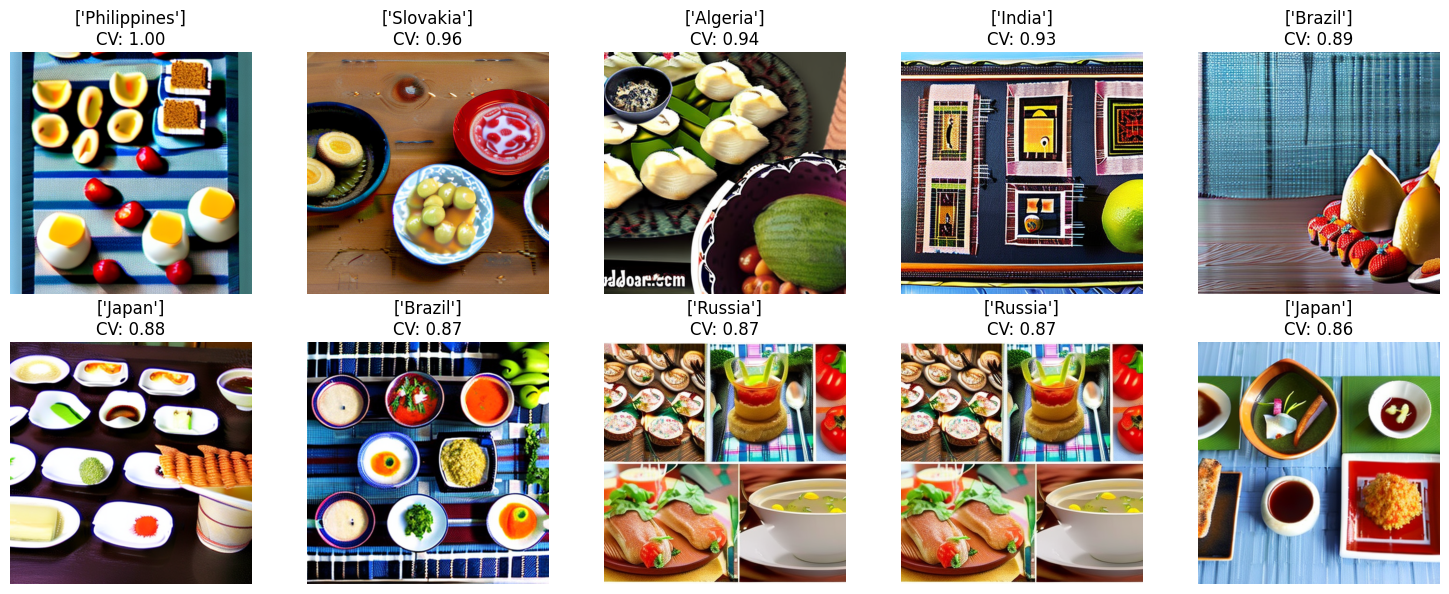

In [163]:
import os
from PIL import Image
import matplotlib.pyplot as plt

cont_df = expanded_df
image_ids = cont_df.index.tolist()
normalized_compound_values = cont_df['normalized_compound_value'].tolist()

sorted_indices = sorted(range(len(normalized_compound_values)), key=lambda k: normalized_compound_values[k], reverse=True)
sorted_image_ids = [image_ids[i] for i in sorted_indices]
sorted_normalized_compound_values = [normalized_compound_values[i] for i in sorted_indices]

# Plot the images
num_images_to_plot = min(10, len(sorted_image_ids))  # Plot the first 10 images or less if there are fewer images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Assuming you want a 2x5 grid for the images
for i, (image_id, compound_value) in enumerate(zip(sorted_image_ids[:num_images_to_plot], sorted_normalized_compound_values[:num_images_to_plot])):
    row = i // 5
    col = i % 5
    image_path = os.path.join('/data/kebl7383/food-bias/', image_id)  # Assuming the images are stored in this directory
    dish_name = extract_country_name(image_id)
    image = Image.open(image_path)
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title(f'{dish_name}\nCV: {compound_value:.2f}')
plt.tight_layout()
plt.show()

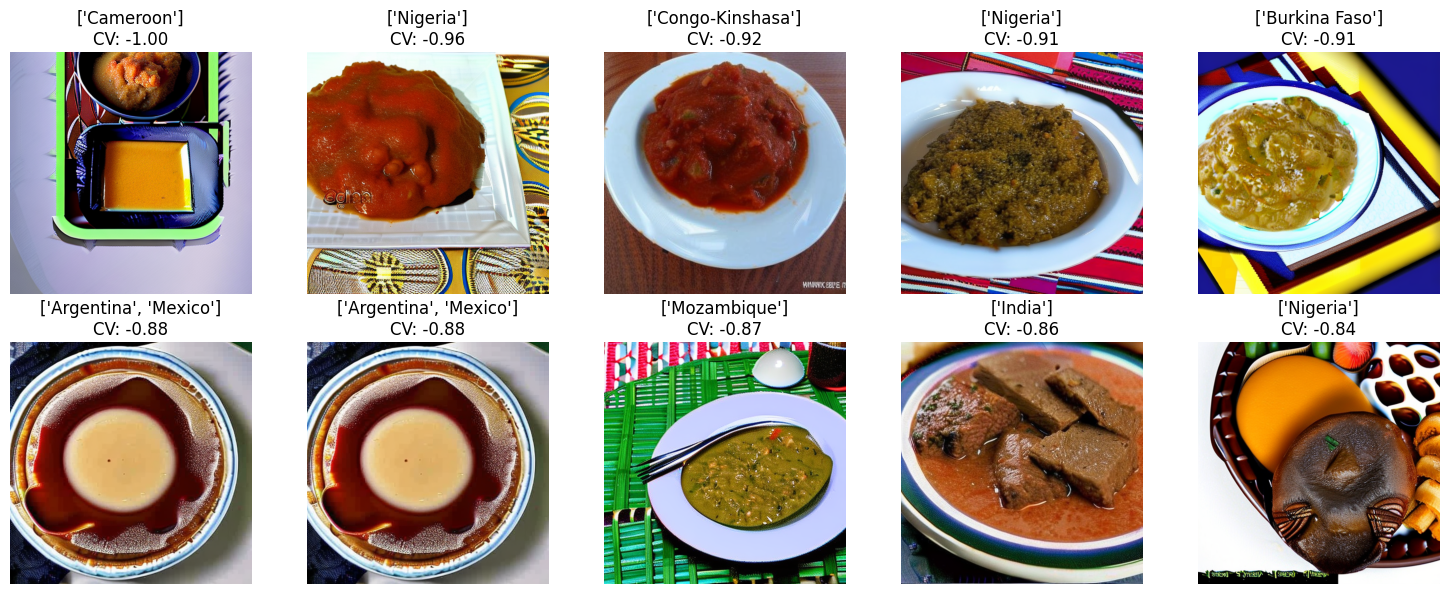

In [164]:
import os
from PIL import Image
import matplotlib.pyplot as plt

cont_df = expanded_df
# cont_df = expanded_df[expanded_df['continent'] == 'Europe']
image_ids = cont_df.index.tolist()
normalized_compound_values = cont_df['normalized_compound_value'].tolist()

sorted_indices = sorted(range(len(normalized_compound_values)), key=lambda k: normalized_compound_values[k], reverse=False)
sorted_image_ids = [image_ids[i] for i in sorted_indices]
sorted_normalized_compound_values = [normalized_compound_values[i] for i in sorted_indices]

# Plot the images
num_images_to_plot = min(10, len(sorted_image_ids))  # Plot the first 10 images or less if there are fewer images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Assuming you want a 2x5 grid for the images
for i, (image_id, compound_value) in enumerate(zip(sorted_image_ids[:num_images_to_plot], sorted_normalized_compound_values[:num_images_to_plot])):
    row = i // 5
    col = i % 5
    image_path = os.path.join('/data/kebl7383/food-bias/', image_id) # Assuming the images are stored in this directory
    dish_name = extract_country_name(image_id)
    image = Image.open(image_path)
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title(f'{dish_name}\nCV: {compound_value:.2f}')
plt.tight_layout()
plt.show()